# Land Mines Detection

## Introducción
Este proyecto se centra en la detección de minas terrestres mediante técnicas de ciencia de datos, un desafío crucial para la seguridad global. La detección precisa de minas enterradas es fundamental para proteger vidas y propiedades en zonas afectadas por conflictos. Aunque se han desarrollado diversos métodos, aún no se ha logrado una detección 100% efectiva, lo que subraya la importancia de la innovación continua en este campo.

Nuestro enfoque integra dos componentes clave de la ciencia de datos: el análisis de datos complejos y el desarrollo de algoritmos de decisión robustos. Nos centramos particularmente en el método de anomalía magnética, una técnica que mide las perturbaciones en el campo magnético causadas por objetos enterrados. Este método, en uso desde 1970, permite determinar parámetros críticos como la posición, profundidad y dirección del movimiento de las minas.

A través de este proyecto, buscamos mejorar la precisión y eficiencia de la detección de minas terrestres, aplicando técnicas modernas de ciencia de datos para abordar un problema de gran impacto humanitario y relevancia global.

## Antecedentes

La detección de minas terrestres ha sido un desafío persistente durante décadas, con una historia que se remonta a los conflictos del siglo XX. Numerosos estudios y avances tecnológicos han contribuido a mejorar las técnicas de detección, pero el problema sigue siendo complejo y urgente.

Investigaciones previas han explorado diversos métodos de detección, incluyendo técnicas de radar de penetración terrestre (GPR), detección de metales, y más recientemente, el uso de drones equipados con sensores especializados. Un estudio destacado de la Universidad de Bristol en 2018 demostró la eficacia de combinar múltiples sensores para mejorar la precisión de la detección.

Las tecnologías actuales incluyen detectores de metales avanzados, sistemas de imágenes térmicas, y algoritmos de aprendizaje automático para el análisis de datos. Sin embargo, cada método tiene sus limitaciones, como la alta tasa de falsos positivos en terrenos con alta concentración de metales o la dificultad de detección en condiciones climáticas adversas.

La Organización de las Naciones Unidas estima que hay aproximadamente 110 millones de minas terrestres activas en el mundo, destacando la magnitud del problema y la necesidad urgente de soluciones innovadoras. Este contexto subraya la importancia de nuestro proyecto, que busca aplicar técnicas avanzadas de ciencia de datos para mejorar la eficacia y eficiencia de la detección de minas terrestres.
El problema central que abordamos en este proyecto es la detección precisa y eficiente de minas terrestres, un desafío crítico que persiste a nivel global con graves implicaciones humanitarias y económicas. A pesar de los avances tecnológicos, la detección de minas terrestres sigue siendo una tarea compleja y peligrosa, con consecuencias potencialmente fatales en caso de error.

La relevancia de este problema se evidencia en las siguientes estadísticas y hechos:

- Según las Naciones Unidas, hay aproximadamente 110 millones de minas terrestres activas en todo el mundo.
- Cada año, las minas terrestres causan miles de víctimas, muchas de ellas civiles.
- El costo de remoción de minas es extremadamente alto, estimado entre 300 y 1000 dolares por mina.

- Las minas terrestres obstaculizan el desarrollo económico y social en las regiones afectadas.

## Objetivos

Los objetivos de nuestro proyecto de detección de minas terrestres utilizando ciencia de datos son los siguientes:

### Objetivos Generales

- Desarrollar una solución de ciencia de datos que mejore la precisión y eficiencia en la detección de minas terrestres y aplicar conceptos avanzados de MLOPS para crear un sistema que pueda ser implementado en situaciones reales.

### Objetivos Específicos

- Realizar un análisis exploratorio exhaustivo de los datos de anomalías magnéticas para identificar patrones y características relevantes en la detección de minas terrestres.
- Implementar técnicas de preprocesamiento de datos para mejorar la calidad y utilidad de la información recopilada por los sensores magnéticos.
- Desarrollar y entrenar un modelo de aprendizaje automático capaz de clasificar con alta precisión las señales de anomalías magnéticas asociadas con minas terrestres.
- Diseñar y construir una API que permita la integración del modelo de detección en sistemas existentes de desminado.
- Contenerizar la solución utilizando Docker para garantizar la portabilidad y facilitar el despliegue en diferentes entornos.
- Desplegar el servicio en una plataforma cloud, asegurando alta disponibilidad y escalabilidad para su uso en operaciones de campo.
- Establecer un pipeline de CI/CD para automatizar el proceso de actualización y mejora continua del modelo y la infraestructura.
- Evaluar el rendimiento del sistema en condiciones simuladas

## Planteamiento del problema



Las técnicas actuales de detección de minas terrestres, aunque han mejorado con el tiempo, aún enfrentan limitaciones significativas:

- Alta tasa de falsos positivos, especialmente en terrenos con alta concentración de metales.
- Baja eficiencia en términos de tiempo y recursos necesarios para el desminado.
- Riesgo constante para el personal involucrado en las operaciones de detección y remoción.

Mediante el análisis avanzado de datos de sensores magnéticos y el aprendizaje automático podemos mejorar significativamente la precisión y eficiencia de la detección de minas terrestres.

## Desarrollo de la solución

### EDA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/Landmines.csv")


df.head()

,V,H,S,M
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


Voltaje (V): Valor de voltaje de salida del sensor FLC debido a la distorsión magnética

Altura (H): La altura del sensor desde el suelo.

Tipo de Suelo (S): 6 diferentes tipos de suelo dependiendo de la condición de humedad.

Tipo de Mina (M): Tipos de minas comúnmente encontradas en tierra. 5 diferentes clases de minas.

In [13]:
df.describe()

,V,H,S,M
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,3.517751,2.952663
std,0.195819,0.306043,1.721218,1.419703
min,0.197734,0.000000,1.000000,1.000000
25%,0.309737,0.272727,2.000000,2.000000
50%,0.359516,0.545455,4.000000,3.000000
75%,0.482628,0.727273,5.000000,4.000000
max,0.999999,1.000000,6.000000,5.000000


In [14]:
df.isnull().sum()

V    0
H    0
S    0
M    0
dtype: int64

No tenemos ningún valor nulo

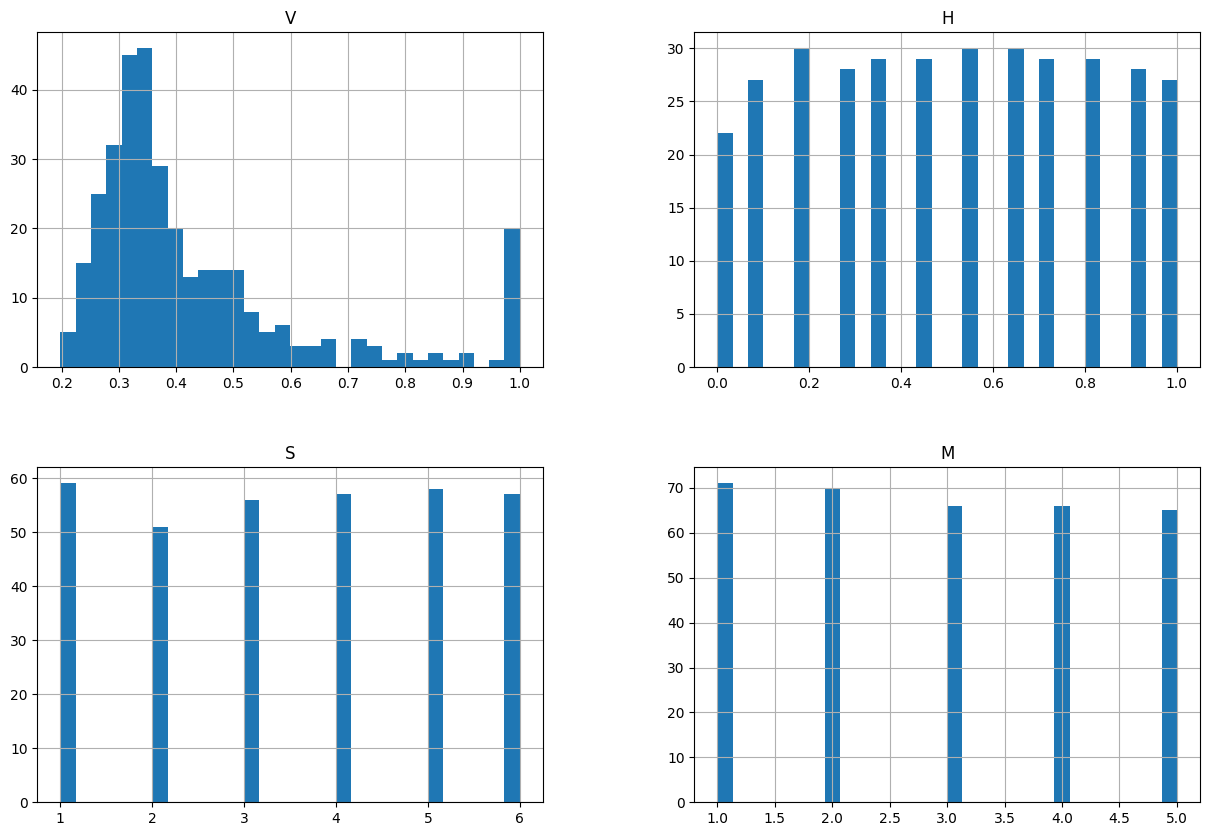

In [15]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

Los valores de voltaje se concentran principalmente entre 0.2 y 0.4, con un pico en 0.3. Se observan valores atípicos cercanos a 1.0, indicando una posible anomalía del sensor.

La distribución de altura y tipos de suelo es uniforme, con mediciones del sensor realizadas equitativamente a diferentes alturas (0.0 a 1.0) y en seis tipos de suelos distintos.

Los diferentes tipos de minas están representados de manera equilibrada en los datos, evitando sesgos hacia un tipo particular y asegurando un análisis imparcial.

Los diferentes tipos de minas están representados de manera casi uniforme en los datos. Esto es importante para asegurarse de que el análisis no esté sesgado hacia un tipo de mina en particular.

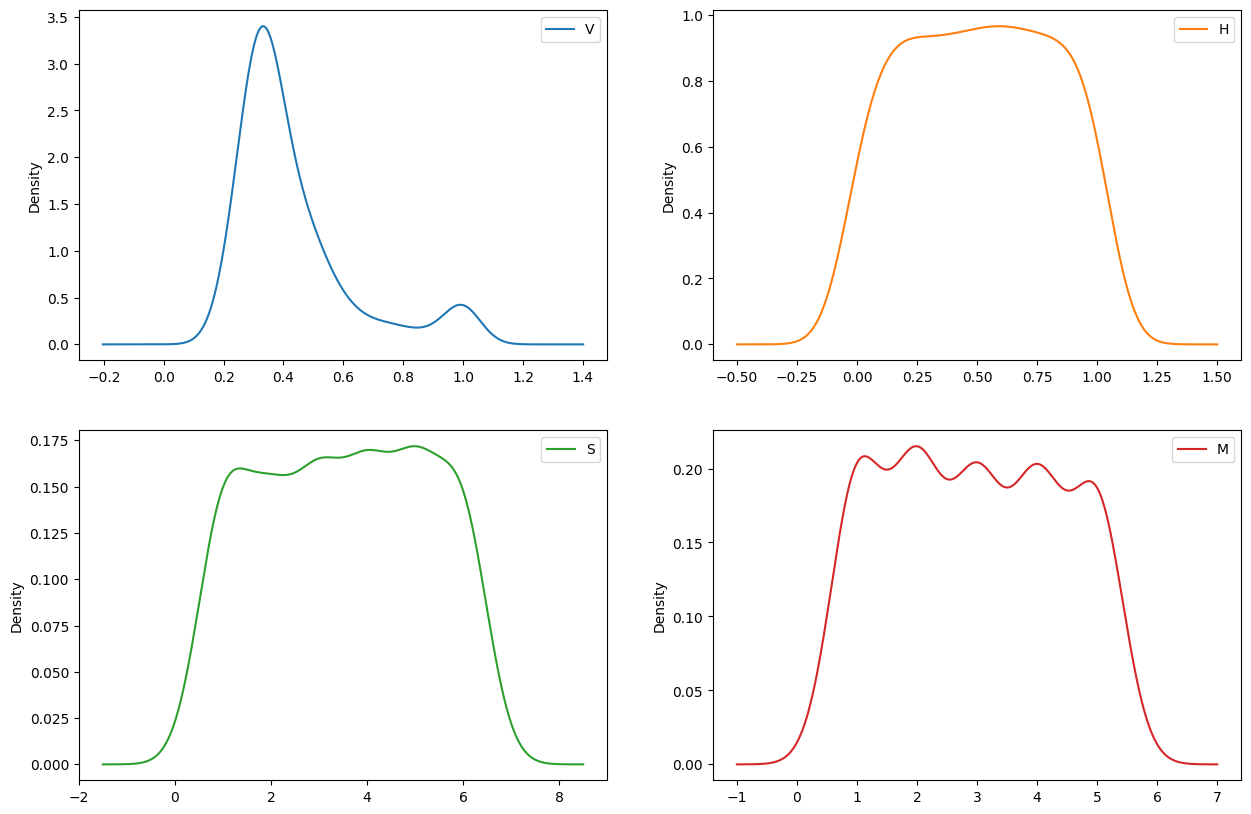

In [16]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(15, 10))
plt.show()

El análisis de densidad revela concentraciones de voltaje alrededor de 0.3 y 1.0, indicando patrones en las mediciones. La distribución uniforme de altura y tipos de suelo sugiere una recolección de datos consistente.

La representación equilibrada de tipos de minas en el dataset, con ligeras fluctuaciones, proporciona una base sólida para el análisis imparcial de los datos.

La densidad de la altura es bastante uniforme, lo que sugiere que el sensor se usó de manera consistente a diferentes alturas.

La densidad es relativamente uniforme en todo el rango de tipos de suelos, con pequeñas fluctuaciones que pueden ser el resultado de variaciones naturales en las observaciones.

La densidad es bastante uniforme, aunque con ligeras fluctuaciones, lo que indica una buena representación de todos los tipos de minas en el dataset.

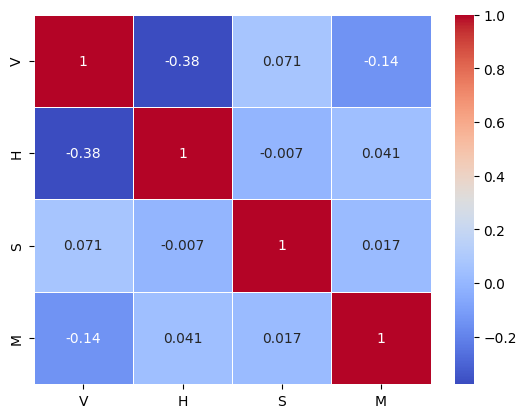

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Hay una correlación negativa entre el voltaje y la altura lo que implica que cuando el sensor está más cerca del suelo (H disminuye), el voltaje tiende a ser más alto.

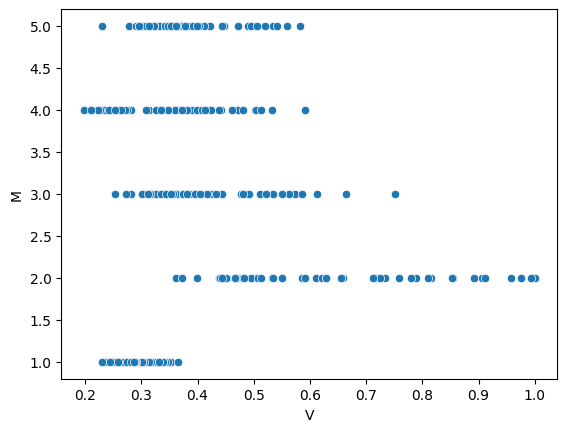

In [18]:
sns.scatterplot(x='V', y='M', data=df)
plt.show()

Este plot muestra el voltaje que tiende a tener cada tipo de mina, esta vizualizacion tiene el objetivo de determinar que variable podria tener mas peso en el modelo

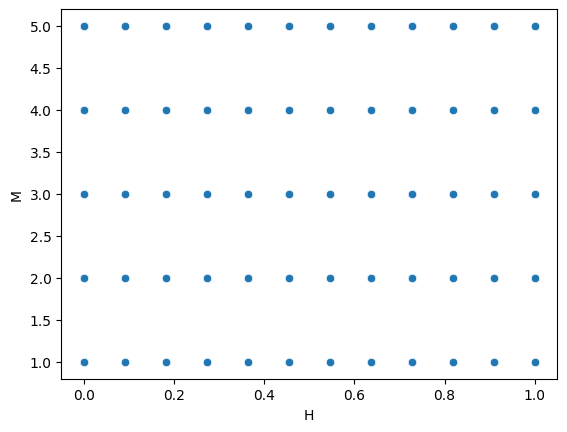

In [19]:
sns.scatterplot(x='H', y='M', data=df)
plt.show()

Plot que contrasta la altura del sensor con respecto al suelo, con el tipo de mina, solo con este plot se podria determinar que esta variable no es muy significativa

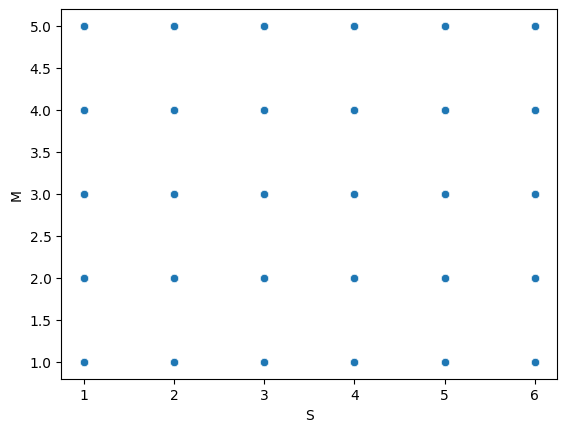

In [20]:
sns.scatterplot(x='S', y='M', data=df)
plt.show()

Plot que contrasta el tipo de suelo con el tipo de mina de igual manera esta variable no parece tan significativa

### Data Wrangling

In [21]:
from scipy.stats import zscore
import numpy as np

df['Z_V'] = zscore(df['V'])

threshold = 2
outliers = df[np.abs(df['Z_V']) > threshold]
outliers

,V,H,S,M,Z_V
47,0.999999,0.000000,1,2,2.911916
48,0.999999,0.090909,1,2,2.911916
49,0.999999,0.272727,1,2,2.911916
50,0.906343,0.363636,1,2,2.432931
55,0.999999,0.000000,4,2,2.911916
56,0.999999,0.090909,4,2,2.911916
57,0.975830,0.272727,4,2,2.788307
70,0.999999,0.000000,5,2,2.911916
71,0.912386,0.181818,5,2,2.463834
72,0.957703,0.272727,5,2,2.695601


In [22]:
df.drop(columns=['Z_V'], inplace=True)

Al analizar las gráficas, inicialmente consideramos que los datos cercanos a 1.0 podrían ser valores atípicos debido a un fallo del sensor. Sin embargo, ahora observamos que todos estos datos pertenecen al tipo de mina 2, lo cual sugiere que no se trata de un error, sino que este tipo de mina tiende a generar estas lecturas de voltaje específicas.

### Entrenamiento del modelo con MLflow

Para entrenar el modelo, se utilizaron **Random Forest** y **Logistic Regression**. Durante este proceso, se integró **MLflow** para registrar los experimentos, incluyendo las configuraciones de hiperparámetros, métricas relevantes como precisión, y la evaluación de diferentes configuraciones.

El modelo con el mejor desempeño fue registrado en el **Model Registry** de MLflow para su posterior uso en producción.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from hyperopt import fmin, tpe, hp, Trials
import mlflow
import mlflow.sklearn

# Entrenamiento de Random Forest
def train_random_forest(params):
    with mlflow.start_run(run_name="RandomForest Experiment"):
        rf = RandomForestClassifier(**params)
        rf.fit(X_train, y_train)
        accuracy = rf.score(X_test, y_test)
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.sklearn.log_model(rf, "model")
        return {"loss": -accuracy, "status": STATUS_OK}

# Entrenamiento de Logistic Regression
def train_logistic_regression(params):
    with mlflow.start_run(run_name="LogisticRegression Experiment"):
        lr = LogisticRegression(**params)
        lr.fit(X_train, y_train)
        accuracy = lr.score(X_test, y_test)
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.sklearn.log_model(lr, "model")
        return {"loss": -accuracy, "status": STATUS_OK}


### Selección del Mejor Modelo

In [ ]:

---

#### **3. Selección del Mejor Modelo**

```markdown
## Selección del Mejor Modelo

Tras registrar múltiples experimentos en MLflow, se identificó el modelo con mejor precisión y rendimiento. Este modelo se seleccionó como **Champion Model** y se registró en la etapa `Production` del Model Registry de MLflow.

### Código utilizado:
```python
from mlflow.tracking import MlflowClient

client = MlflowClient()
best_model_run = client.search_runs(
    experiment_ids=["1"],
    filter_string="metrics.accuracy > 0.90",
    order_by=["metrics.accuracy DESC"]
)[0]

model_uri = f"runs:/{best_model_run.info.run_id}/model"
client.register_model(model_uri, "ChampionModel")
